In [22]:
import numpy as np
maze= np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1], 
                [1, 2, 2, 2, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1], 
                [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1], 
                [1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], 
                [1, 2, 0, 1, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1], 
                [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1],
                [1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1], 
                [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1], 
                [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                [1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1], 
                [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1], 
                [1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1], 
                [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], 
                [1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], 
                [1, 0, 0, 0, 4, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 2, 2, 1],
                [1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
                [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 3, 0, 0, 3, 0, 1], 
                [1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],np.int32)

#Define start and goal point
start_position = None
goal_position = None
for i in range(len(maze)):
    for j in range(len(maze[i])):
        if maze[i][j] == 4:
            start_position = (i, j)
        elif maze[i][j] == 5:
            goal_position = (i, j)
# Define state space
S = []
for i in range(len(maze)):
    for j in range(len(maze[i])):
        if maze[i][j] != 1:
            S.append((i, j))

# Define action space
A = ["U", "D", "L", "R"]

# Define transition probabilities
p = 0.02
anticipated_p = 1 - p
neighbor_p = p / 3

# Define reward function
def reward(state):
    i, j = state
    cell = maze[i][j]
    if cell == 1:  # wall
        return None
    elif cell == 2 or cell == 3:  # oil or bump
        return -5 if cell == 2 else -10
    elif cell == 5:  # goal
        return 200
    else:  # empty space
        return -1


gamma = 0.95
theta = 0.01

def next_state(state, action):
    if action == "U":
        return (state[0] - 1, state[1])
    elif action == "D":
        return (state[0] + 1, state[1])
    elif action == "L":
        return (state[0], state[1] - 1)
    elif action == "R":
        return (state[0], state[1] + 1)

def action_value(state, action, V):
    next_s = next_state(state, action)
    if next_s in S:
        anticipated_value = anticipated_p * (reward(next_s) + gamma * V[next_s])
        neighbor_value = 0
        for neighbor_action in A:
            if neighbor_action != action:
                neighbor_s = next_state(state, neighbor_action)
                if neighbor_s in S:
                    neighbor_value += neighbor_p * (reward(neighbor_s) + gamma * V[neighbor_s])
        return anticipated_value + neighbor_value
    else:
        return -np.inf

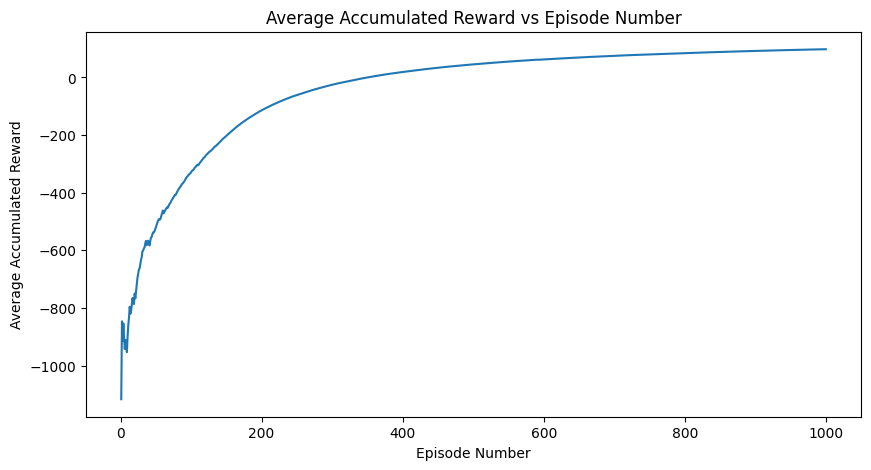

Q values:
(1, 1):
  U: 14.39
  D: -7.52
  L: -6.61
  R: 69.49
(1, 2):
  U: 17.49
  D: 0.74
  L: -5.90
  R: 84.18
(1, 3):
  U: -5.55
  D: 34.43
  L: 18.43
  R: 89.99
(1, 4):
  U: 90.53
  D: 76.54
  L: 81.91
  R: 94.35
(1, 5):
  U: 96.03
  D: 96.17
  L: 80.60
  R: 100.98
(1, 6):
  U: 100.98
  D: 91.11
  L: 92.73
  R: 110.79
(1, 7):
  U: 102.24
  D: 104.15
  L: 100.69
  R: 122.43
(1, 8):
  U: 122.95
  D: 83.40
  L: 108.78
  R: 133.31
(1, 9):
  U: 127.89
  D: 101.94
  L: 115.53
  R: 144.83
(1, 10):
  U: 137.97
  D: 156.86
  L: 125.53
  R: 147.26
(1, 11):
  U: 74.66
  D: 166.18
  L: 69.36
  R: 69.40
(1, 12):
  U: 44.86
  D: 172.73
  L: -1.50
  R: -0.30
(1, 13):
  U: -0.80
  D: 188.99
  L: 45.34
  R: 11.91
(1, 14):
  U: -0.51
  D: 73.19
  L: -0.30
  R: -0.30
(1, 15):
  U: -0.80
  D: -0.74
  L: 7.27
  R: -1.15
(1, 16):
  U: -1.52
  D: -5.10
  L: -0.61
  R: -1.13
(1, 17):
  U: -1.81
  D: -1.64
  L: -1.54
  R: -1.66
(1, 18):
  U: -1.80
  D: -1.89
  L: -1.82
  R: -2.07
(2, 1):
  U: 59.12
  D: -6

In [23]:
import numpy as np
import random
import matplotlib.pyplot as plt

def epsilon_greedy_policy(state, Q, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(A)
    else:
        return max(A, key=lambda action: Q[(state, action)])

# Initialize Q table
Q = {}
for state in S:
    for action in A:
        Q[(state, action)] = 0

# Set the parameters
epsilon = 0.1
alpha = 0.3
num_episodes = 1000
max_steps = 1000

accumulated_rewards = []

for episode in range(num_episodes):
    state = start_position
    action = epsilon_greedy_policy(state, Q, epsilon)
    step_count = 0
    total_reward = 0

    while state != goal_position and step_count < max_steps:
        next_s = next_state(state, action)
        if next_s not in S:
            next_s = state
        
        reward_s_a = reward(next_s)
        total_reward += reward_s_a
        next_action = epsilon_greedy_policy(next_s, Q, epsilon)
        Q[(state, action)] += alpha * (reward_s_a + gamma * Q[(next_s, next_action)] - Q[(state, action)])
        
        state = next_s
        action = next_action
        step_count += 1

    accumulated_rewards.append(total_reward)

average_rewards = [np.mean(accumulated_rewards[:i+1]) for i in range(len(accumulated_rewards))]

# Plot the average accumulated reward with respect to the episode number
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_episodes + 1), average_rewards)
plt.xlabel('Episode Number')
plt.ylabel('Average Accumulated Reward')
plt.title('Average Accumulated Reward vs Episode Number')
plt.show()




print("Q values:")
for state in S:
    print(f"{state}:")
    for action in A:
        print(f"  {action}: {Q[(state, action)]:.2f}")


In [24]:
def get_optimal_policy(Q):
    optimal_policy = {}
    for state in S:
        best_action = max(A, key=lambda action: Q[(state, action)])
        optimal_policy[state] = best_action
    return optimal_policy

def get_optimal_path(optimal_policy, start_position, goal_position):
    optimal_path = []
    state = start_position
    while state != goal_position:
        optimal_path.append(state)
        action = optimal_policy[state]
        state = next_state(state, action)
    optimal_path.append(goal_position)
    return optimal_path

optimal_policy = get_optimal_policy(Q)
optimal_path = get_optimal_path(optimal_policy, start_position, goal_position)

print("Optimal policy:")
for state in S:
    print(f"{state}: {optimal_policy[state]}")

print("Optimal path:")
for state in optimal_path:
    print(state)


Optimal policy:
(1, 1): R
(1, 2): R
(1, 3): R
(1, 4): R
(1, 5): R
(1, 6): R
(1, 7): R
(1, 8): R
(1, 9): R
(1, 10): D
(1, 11): D
(1, 12): D
(1, 13): D
(1, 14): D
(1, 15): L
(1, 16): L
(1, 17): L
(1, 18): U
(2, 1): U
(2, 2): U
(2, 3): D
(2, 4): U
(2, 6): U
(2, 7): U
(2, 8): R
(2, 9): R
(2, 10): R
(2, 11): R
(2, 12): R
(2, 13): D
(2, 14): L
(2, 15): L
(2, 16): D
(2, 17): U
(2, 18): D
(3, 1): R
(3, 2): R
(3, 3): R
(3, 4): U
(3, 6): U
(3, 7): R
(3, 8): R
(3, 9): R
(3, 10): U
(3, 11): R
(3, 12): R
(3, 13): U
(3, 14): L
(3, 15): L
(3, 16): L
(3, 17): L
(3, 18): L
(4, 1): U
(4, 2): L
(4, 17): U
(4, 18): U
(5, 1): U
(5, 2): L
(5, 4): D
(5, 5): U
(5, 6): U
(5, 7): U
(5, 8): D
(5, 9): R
(5, 10): R
(5, 11): R
(5, 12): R
(5, 13): R
(5, 14): R
(5, 15): R
(5, 16): R
(5, 17): U
(5, 18): U
(6, 1): U
(6, 2): L
(6, 4): D
(6, 5): R
(6, 7): U
(6, 8): D
(6, 10): R
(6, 11): R
(6, 12): R
(6, 13): R
(6, 14): U
(6, 16): U
(6, 17): R
(6, 18): U
(7, 1): U
(7, 2): U
(7, 4): D
(7, 5): D
(7, 7): U
(7, 8): U
(7, 10):

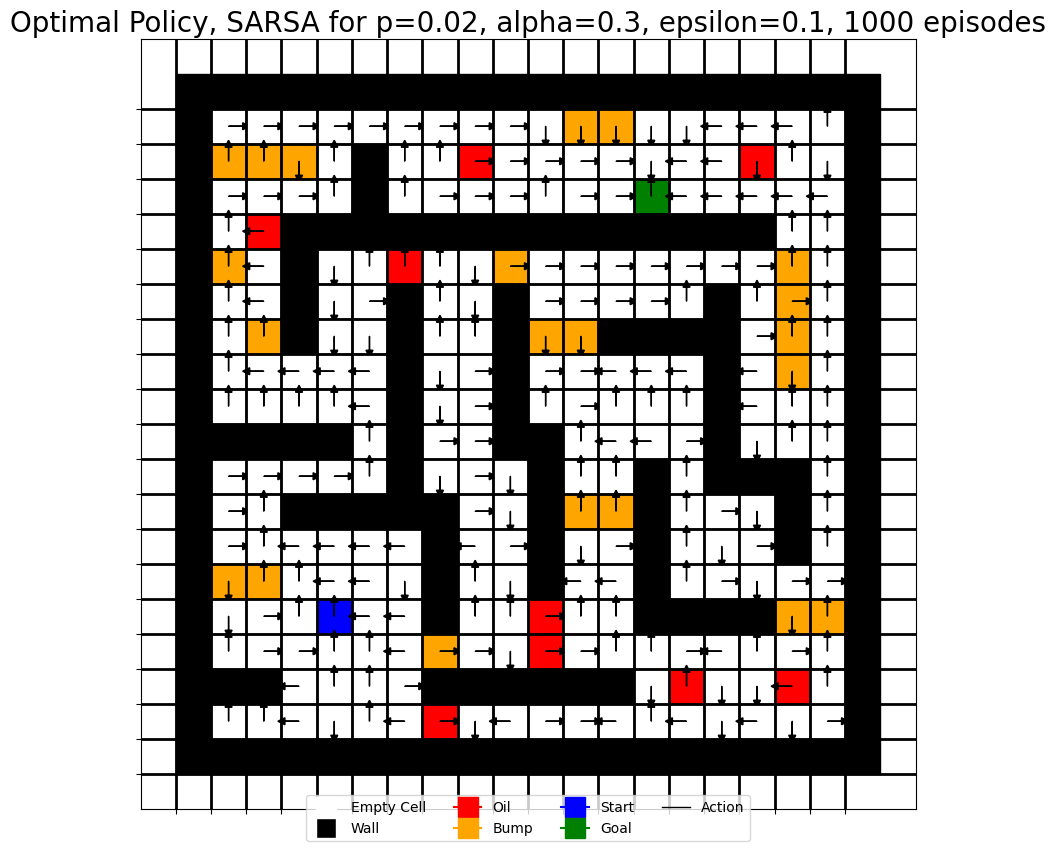

In [25]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

cmap = plt.get_cmap('tab20')
colors = {
    1: 'black',
    2: 'orange',
    3: 'red',
    4: 'blue',
    5: 'green',
    0: 'white'
}

fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(maze)):
   for j in range(len(maze[i])):
        cell_type = maze[i][j]
        color = colors[cell_type]
        rect = plt.Rectangle((j, len(maze) - i - 1), 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)
        if cell_type != 1:
            action = optimal_policy[(i, j)]
            
            # Draw arrow
            dx, dy = 0, 0
            if action == "U":
                dy = 0.4
            elif action == "D":
                dy = -0.4
            elif action == "L":
                dx = -0.4
            elif action == "R":
                dx = 0.4
            ax.arrow(j+0.5, len(maze)-i-0.48, dx, dy, head_width=0.2, head_length=0.2, fc='black', ec='black')

ax.set_xticks(np.arange(0, len(maze[0]), 1))
ax.set_yticks(np.arange(0, len(maze), 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, color='black', linestyle='-', linewidth=2)

legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='Empty Cell', markerfacecolor='white', markersize=15),
    Line2D([0], [0], marker='s', color='w', label='Wall', markerfacecolor='black', markersize=15),
    Line2D([0], [0], marker='s', color='red', label='Oil', markerfacecolor='red', markersize=15),
    Line2D([0], [0], marker='s', color='orange', label='Bump', markerfacecolor='orange', markersize=15),
    Line2D([0], [0], marker='s', color='b', label='Start', markerfacecolor='blue', markersize=15),
    Line2D([0], [0], marker='s', color='g', label='Goal', markerfacecolor='green', markersize=15),
    Line2D([0], [0], color='black', lw=1, label='Action'),
]
ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
ax.set_title('Optimal Policy, SARSA for p=0.02, alpha=0.3, epsilon=0.1, 1000 episodes', fontsize=20)
plt.show()

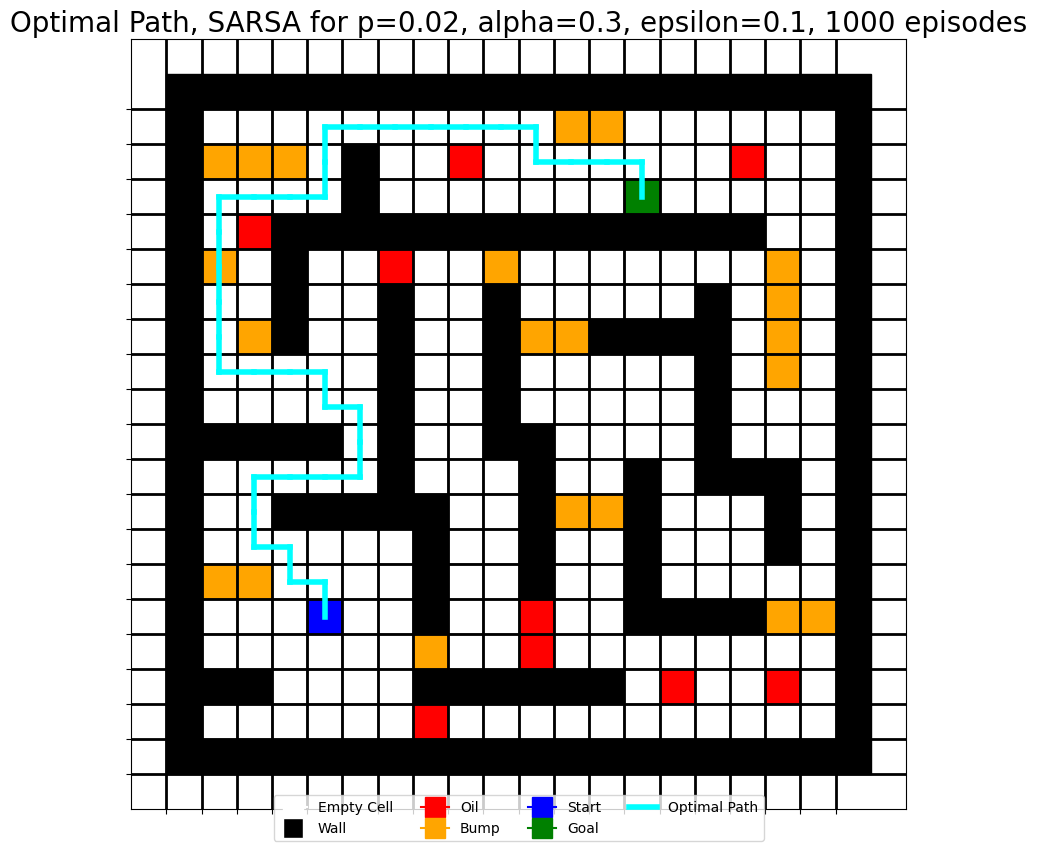

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(maze)):
   for j in range(len(maze[i])):
        cell_type = maze[i][j]
        color = colors[cell_type]
        rect = plt.Rectangle((j, len(maze) - i - 1), 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)

# Draw optimal path
for i in range(len(optimal_path) - 1):
    cur_state = optimal_path[i]
    next_state = optimal_path[i + 1]
    plt.plot([cur_state[1] + 0.5, next_state[1] + 0.5], [len(maze) - cur_state[0] - 0.5, len(maze) - next_state[0] - 0.5], 'cyan', linewidth=4)

ax.set_xticks(np.arange(0, len(maze[0]), 1))
ax.set_yticks(np.arange(0, len(maze), 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, color='black', linestyle='-', linewidth=2)

legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='Empty Cell', markerfacecolor='white', markersize=15),
    Line2D([0], [0], marker='s', color='w', label='Wall', markerfacecolor='black', markersize=15),
    Line2D([0], [0], marker='s', color='red', label='Oil', markerfacecolor='red', markersize=15),
    Line2D([0], [0], marker='s', color='orange', label='Bump', markerfacecolor='orange', markersize=15),
    Line2D([0], [0], marker='s', color='b', label='Start', markerfacecolor='blue', markersize=15),
    Line2D([0], [0], marker='s', color='g', label='Goal', markerfacecolor='green', markersize=15),
    Line2D([0], [0], color='cyan', lw=4, label='Optimal Path'),
]
ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
ax.set_title('Optimal Path, SARSA for p=0.02, alpha=0.3, epsilon=0.1, 1000 episodes', fontsize=20)
plt.show()
